In [49]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import pandas as pd
import shap
import sys
sys.path.append('../')
shap.initjs()

In [50]:
X = pd.read_csv('../final_table.csv')
y = X['Result']
X.drop('Result', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [51]:
scaler_X = RobustScaler()
X_train[X_train.columns] = scaler_X.fit_transform(X_train)
X_test[X_test.columns] = scaler_X.transform(X_test)

In [52]:
X_train.head()

Hm_G  Hm_MP     Hm_FG    Hm_FGA    Hm_FGP     Hm_TP    Hm_TPA  \
7061    0.0   0.60  1.777778  0.801296  1.428571  1.465517  1.097959   
9133  -16.0 -31.52 -3.199074 -2.835853 -0.761905 -1.062069 -0.965986   
6156    0.0  -0.60  0.356481  0.548596 -0.238095  0.662069  0.843537   
10331 -16.0 -30.92 -3.148148 -2.950324 -0.476190 -1.293103 -1.273469   
6169    0.0   0.20 -1.375000 -0.976242 -0.666667 -0.555172 -0.560544   

         Hm_tPp     Hm_wP    Hm_wPA  ...  Vis_eFG%  Vis_TOV%  Vis_ORB%  \
7061   2.458333 -0.132530 -0.572086  ... -0.823529 -0.642857  0.046512   
9133  -1.541667 -1.506024 -0.828221  ...  0.676471 -0.285714  0.000000   
6156  -0.250000 -0.429719 -0.464724  ...  1.000000 -0.785714 -0.488372   
10331 -1.291667 -1.192771 -0.562883  ...  0.323529  0.642857  0.604651   
6169   0.041667 -0.514056  0.035276  ... -0.470588 -0.500000  0.883721   

       Vis_FT/FGA  Vis_eFG%.1  Vis_TOV%.1  Vis_DRB%  Vis_FT/FGA.1  Vis_rating  \
7061     0.636364    0.518519    1.428571  0.064516       1.25000         0.0   
9133    -0.454545   -0.555556   -0.214286  0.354839      -1.34375         1.0   
6156    -0.363636   -0.111111   -0.142857  0.903226       0.03125         0.5   
10331    0.878788    0.148148    0.785714 -0.193548      -0.81250         0.0   
6169     0.696970    0.333333    0.214286 -0.677419       0.18750         0.0   

       days_from_start  
7061          0.440000  
9133          1.373333  
6156          0.160000  
10331        -1.106667  
6169          0.160000  

[5 rows x 89 columns]

In [53]:
y_train.head()

7061     -6.0
9133     30.0
6156      3.0
10331    15.0
6169     10.0
Name: Result, dtype: float64

In [54]:

las = Lasso(max_iter=10000)

ls_model = las.fit(X_train, y_train)
ls_predictions = ls_model.predict(X_test)

print(f"{las.score(X_test, y_test)}")

-0.00013507013867020135


In [55]:
y_t_res = np.sign(y_test.values)
y_p_res = np.sign(ls_predictions)
np.equal(y_p_res, y_t_res).mean()

0.6006878104700039

In [56]:
ls_predictions = ls_model.predict(X_train)
y_train_res = np.sign(y_train.values)
y_p_res = np.sign(ls_predictions)
np.equal(y_p_res, y_train_res).mean()

0.593451395082176

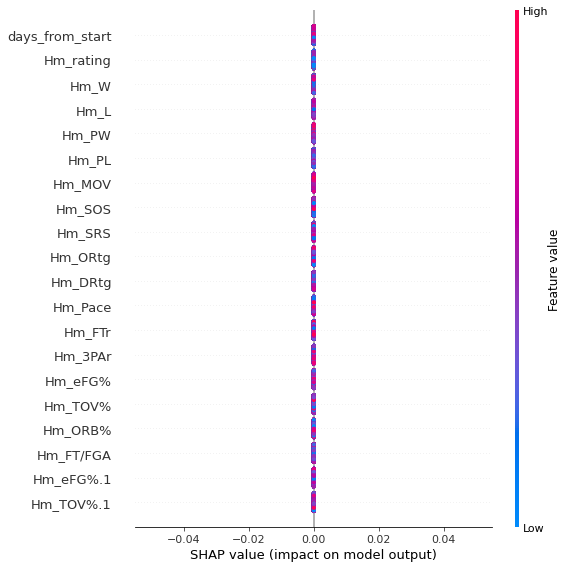

In [57]:
masker = shap.maskers.Independent(data = X_train)
explainer = shap.LinearExplainer(ls_model, masker=masker)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)